# Project: Detection of key points and their correspondences in satellite images

Model: SuperPoint

### Objective: Detection of key points and descriptors for image pairs

data: 16.11.2024


### A general explanation of the logic associated with the inference.py file 

    Global Configurations:

- Paths like MODEL_WEIGHTS_PATH, PROCESSED_DATA_PATH, and OUTPUT_PATH are defined for clarity and reusability.

- device dynamically selects the available device (cuda or cpu).

    detect_keypoints_and_descriptors Function:

Purpose: Extracts keypoints and descriptors from a single image.

Steps:

- Normalize the input image to the range [0, 1] for model compatibility.

- Convert the image into a 4D tensor with shape (1, 1, H, W) (batch size of 1, single channel).

- Perform inference with the SuperPoint model.

- Convert the results (keypoints and descriptors) back to NumPy arrays for easier handling.

    process_images Function:

Purpose: Processes all images in a .npy file and saves their keypoints and descriptors.

Steps:

- Load images stored in .npy format.

- Iterate over all images and process each using detect_keypoints_and_descriptors.

- Save keypoints and descriptors for each image in separate .npy files in the output_path.

    Main Block:

Purpose: Provides an entry point for the script.

Steps:

- Loads the SuperPoint model with pre-trained weights using load_model.

- Calls process_images to process images stored in test_grayscale.npy.

- Prints status messages for user feedback during execution.

    Highlights:

- Modular and reusable design.

- Detailed print statements for progress tracking.

Let's move on to visualising the results of the project:

In [ ]:
import numpy as np

 
# Loading key points and descriptors
keypoints1 = np.load("./Task2_CVis_Sentinel2/results/image_2_keypoints.npy")
descriptors1 = np.load("./Task2_CVis_Sentinel2/results/image_2_descriptors.npy")

keypoints2 = np.load("./Task2_CVis_Sentinel2/results/image_5_keypoints.npy")
descriptors2 = np.load("./Task2_CVis_Sentinel2/results/image_5_descriptors.npy")

#keypoints1 = np.load("C:/Users/work_/OneDrive/Робочий стіл/test_task/Task2_CVis_Sentinel2/results/image_2_keypoints.npy")
#descriptors1 = np.load("C:/Users/work_/OneDrive/Робочий стіл/test_task/Task2_CVis_Sentinel2/results/image_2_descriptors.npy")

#keypoints2 = np.load("C:/Users/work_/OneDrive/Робочий стіл/test_task/Task2_CVis_Sentinel2/results/image_5_keypoints.npy")
#descriptors2 = np.load("C:/Users/work_/OneDrive/Робочий стіл/test_task/Task2_CVis_Sentinel2/results/image_5_descriptors.npy")

print(f"Shape of key points for image 1: {keypoints1.shape}")
print(f"Shape of key points for image 1: {descriptors1.shape}")


In [ ]:
image1 = np.load('./Task2_CVis_Sentinel2/data/processed/test_grayscale.npy')[0][0]
image2 = np.load('./Task2_CVis_Sentinel2/data/processed/test_grayscale.npy')[1][0]

#image1 = np.load("C:/Users/work_/OneDrive/Робочий стіл/test_task/Task2_CVis_Sentinel2/data/processed/test_grayscale.npy")[2][0]
#image2 = np.load("C:/Users/work_/OneDrive/Робочий стіл/test_task/Task2_CVis_Sentinel2/data/processed/test_grayscale.npy")[5][0]


In [ ]:
 
import numpy as np
def extract_keypoints_from_map(keypoint_map, threshold=0.5):
    """Extracts the coordinates of key points from the map.
    
    Args:
        keypoint_map (ndarray): A map of key points (C, H, W).
        threshold (float): The threshold for considering keypoints.
        
    Returns:
        list: A list of key point coordinates [(y, x), ...]."""
    
    # Aggregation by channels (256 -> 1 map)
    aggregated_map = np.max(keypoint_map, axis=0) # Size (H, W)
    # Extracting coordinates that exceed the threshold
    keypoints = np.argwhere(aggregated_map > threshold) # (y, x)
    return keypoints


In [ ]:
keypoints1_coords = extract_keypoints_from_map(keypoints1, threshold=0.5)
keypoints2_coords = extract_keypoints_from_map(keypoints2, threshold=0.5)

print(f"Num of keypoints for image 1: {len(keypoints1_coords)}")
print(f"Num of keypoints for image 2: {len(keypoints2_coords)}")


In [ ]:
# Image size
height, width = image1.shape

 
# Filtering key points to limit the coordinates
filtered_keypoints1 = [(y, x) for y, x in keypoints1_coords if 0 <= y < height and 0 <= x < width]
filtered_keypoints2 = [(y, x) for y, x in keypoints2_coords if 0 <= y < height and 0 <= x < width]

print(f 'Filtered keypoints for image 1: {len(filtered_keypoints1)}')
print(f 'Filtered keypoints for image 2: {len(filtered_keypoints2)}')



In [ ]:
import matplotlib.pyplot as plt
import cv2

def draw_keypoints(image, keypoints):
    """
    Draws keypoints on the input image.
    Args:
        image (ndarray): Input grayscale image (H, W).
        keypoints (ndarray): Array of keypoint coordinates in the format (y, x).
    Returns:
        image_with_keypoints (ndarray): Image with keypoints drawn in green.
    """
    # Convert the grayscale image to a BGR image to display colored keypoints
    image_with_keypoints = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Iterate over the keypoints and draw a circle for each valid keypoint
    for y, x in keypoints:
        # Ensure the keypoint coordinates are within the image boundaries
        if 0 <= y < image.shape[0] and 0 <= x < image.shape[1]:
            # Draw a green circle at the keypoint position
            cv2.circle(image_with_keypoints, (int(x), int(y)), 3, (0, 255, 0), -1)
    return image_with_keypoints

# Visualization of keypoints
plt.figure(figsize=(12, 6))  # Create a figure with a fixed size for better visualization

# Display keypoints for the first image
plt.subplot(1, 2, 1)  # Create a subplot for the first image
plt.imshow(draw_keypoints(image1, keypoints1_coords), cmap='gray')  # Draw and display keypoints
plt.title("Keypoints - Image 1")  # Add a title to the first subplot
plt.axis('off')  # Remove axis ticks and labels for a cleaner look

# Display keypoints for the second image
plt.subplot(1, 2, 2)  # Create a subplot for the second image
plt.imshow(draw_keypoints(image2, keypoints2_coords), cmap='gray')  # Draw and display keypoints
plt.title("Keypoints - Image 2")  # Add a title to the second subplot
plt.axis('off')  # Remove axis ticks and labels for a cleaner look

# Show the complete visualization
plt.show()


    Detailed Comments:

    - draw_keypoints Function:

Purpose: Draws keypoints on an input grayscale image.

Arguments:

- image: The input grayscale image where keypoints will be drawn.

- keypoints: Array containing the coordinates of keypoints in (y, x) format.

Steps:

Converts the grayscale image to a BGR format using cv2.cvtColor to allow colored annotations.

Iterates over the keypoints array and validates that each keypoint falls within the image boundaries to avoid drawing errors.

Draws a green circle with a radius of 3 pixels for each valid keypoint using cv2.circle.

Return Value: Returns the image with all keypoints drawn.

    - Visualization Block:

Purpose: Displays two images side by side with their respective keypoints.

Steps:

Creates a figure with a fixed size using plt.figure.

Adds a subplot for the first image, draws its keypoints using draw_keypoints, and displays it with a title.

Repeats the same for the second image.

Removes axis ticks and labels using plt.axis('off') for a cleaner display.

Finally, displays the visualized images using plt.show.

    - Customizations:

The keypoints are drawn in green for better visibility against the grayscale image.

The cmap='gray' ensures that the background image is displayed in grayscale even though keypoints are drawn in color.

Image dimensions and formatting are carefully handled to avoid runtime errors.

The previous implementation resulted in a rather strange display, so let's try to modify the code a bit and try to track down the possible cause of this behaviour:

In [ ]:
def extract_keypoints_from_heatmap(heatmap, threshold=0.5):
    """
    Converts a heatmap of keypoints into a list of keypoint coordinates.

    Args:
        heatmap (ndarray): A keypoint heatmap with shape (C, H, W), where:
            - C is the number of channels (keypoint types or classes),
            - H is the height of the image,
            - W is the width of the image.
        threshold (float): A threshold value for filtering significant keypoints.
            - Only values greater than this threshold are considered valid keypoints.

    Returns:
        list: A list of keypoint coordinates [(y, x), ...], where:
            - `y` is the vertical (row) coordinate,
            - `x` is the horizontal (column) coordinate.
    """
    # Initialize an empty list to store the extracted keypoints
    keypoints = []

    # Iterate through each channel in the heatmap
    for c in range(heatmap.shape[0]):
        # Extract the heatmap for the current channel
        channel_map = heatmap[c]

        # Find the coordinates of all points in the heatmap that exceed the threshold
        coords = np.argwhere(channel_map > threshold)

        # Convert the array of coordinates to a list and add them to the overall list of keypoints
        keypoints.extend(coords.tolist())

    # Return the list of extracted keypoint coordinates
    return keypoints


In [ ]:
keypoints1_coords = extract_keypoints_from_heatmap(keypoints1, threshold=0.5)
keypoints2_coords = extract_keypoints_from_heatmap(keypoints2, threshold=0.5)


In [ ]:
def draw_keypoints(image, keypoints):
    """
    Draws keypoints on a given grayscale image.

    Args:
        image (ndarray): The input image, represented as a 2D array (H, W), where:
            - `H` is the height of the image.
            - `W` is the width of the image.
            - The image should be in grayscale format.
        keypoints (list): A list of keypoint coordinates in the format [(y, x), ...], where:
            - `y` is the vertical (row) coordinate of the keypoint.
            - `x` is the horizontal (column) coordinate of the keypoint.

    Returns:
        image_with_keypoints (ndarray): The input image with keypoints drawn on it, converted to BGR format.
    """
    # Convert the grayscale image to a BGR image to allow colored drawing
    # OpenCV uses BGR format for colored images
    image_with_keypoints = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Iterate over the list of keypoints
    for y, x in keypoints:
        # Ensure the keypoint coordinates are within the image boundaries
        if 0 <= y < image.shape[0] and 0 <= x < image.shape[1]:
            # Draw a green circle at the keypoint location
            # cv2.circle:
            # - Parameters:
            #   - image_with_keypoints: The image to draw on.
            #   - (int(x), int(y)): The center of the circle (converted to integers).
            #   - 3: Radius of the circle.
            #   - (0, 255, 0): Color of the circle in BGR format (green).
            #   - -1: Thickness (-1 fills the circle).
            cv2.circle(image_with_keypoints, (int(x), int(y)), 3, (0, 255, 0), -1)

    # Return the image with keypoints drawn
    return image_with_keypoints


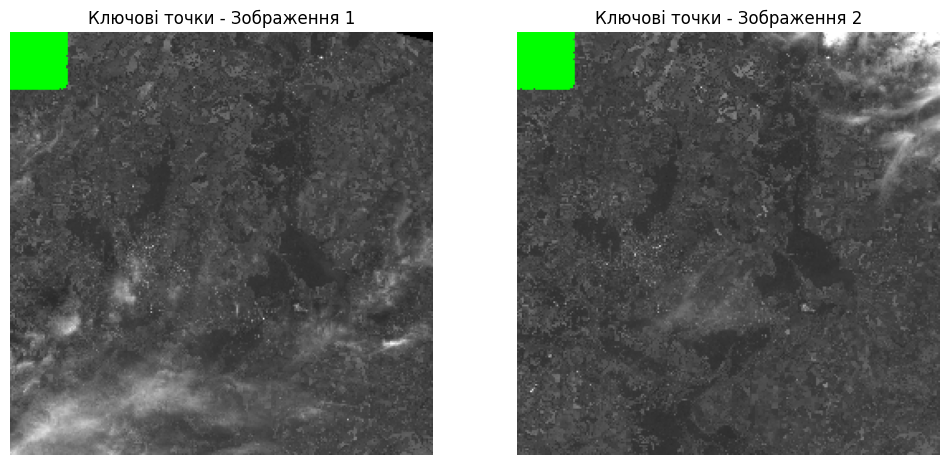

In [ ]:
plt.figure(figsize=(12, 6))
# Creates a new figure for plotting with specified dimensions.
# - figsize=(12, 6): Sets the size of the figure to 12 inches wide and 6 inches tall.

# First subplot for Image 1
plt.subplot(1, 2, 1)
# Adds a subplot to the figure with a 1x2 grid layout (1 row, 2 columns), and selects the first subplot.

plt.imshow(draw_keypoints(image1, keypoints1_coords), cmap='gray')
# Displays the first image with its keypoints overlaid.
# - draw_keypoints(image1, keypoints1_coords): Applies the `draw_keypoints` function to draw keypoints on `image1`.
# - cmap='gray': Ensures the image is displayed in grayscale, overriding any color information.

plt.title("Ключові точки - Зображення 1")
# Sets the title for the first subplot as "Keypoints - Image 1" (translated from Ukrainian).

plt.axis('off')
# Turns off the axes for the subplot, making the visualization cleaner without tick marks or labels.

# Second subplot for Image 2
plt.subplot(1, 2, 2)
# Adds another subplot to the figure in the 1x2 grid layout, selecting the second subplot.

plt.imshow(draw_keypoints(image2, keypoints2_coords), cmap='gray')
# Displays the second image with its keypoints overlaid.
# - draw_keypoints(image2, keypoints2_coords): Applies the `draw_keypoints` function to draw keypoints on `image2`.
# - cmap='gray': Ensures the image is displayed in grayscale.

plt.title("Ключові точки - Зображення 2")
# Sets the title for the second subplot as "Keypoints - Image 2" (translated from Ukrainian).

plt.axis('off')
# Turns off the axes for the second subplot.

plt.show()
# Renders and displays the complete figure with both subplots.
# - The figure contains two side-by-side images with their keypoints visualized, making it easier to compare them.


In [47]:
print(f"Кількість ключових точок для зображення 1: {len(keypoints1_coords)}")
print(f"Кількість ключових точок для зображення 2: {len(keypoints2_coords)}")


Кількість ключових точок для зображення 1: 1003
Кількість ключових точок для зображення 2: 1007


 
The problem with green squares remained even after the changes were made, here are the possible reasons:
---
### **1. Incorrect interpretation of key points**.
The key points represented in the format `(256, 32, 32)` are probably a feature map with a channel depth of `256`. This structure does not correspond to the `(y, x)` coordinate format of the points. If we use them directly in the visualisation, each channel will be treated as a set of coordinates, which may cause squares to appear.
**Possible problem scenario:**.
- We are using ‘depth’ (`256`) as a coordinate in indexing or displaying, which creates incorrect point positions.
**Solution.
We need to convert this map to real point coordinates. For example, by searching for local maxima or comparing with a threshold value.
---
### **2. Incorrect data format during visualisation**.
The image may be in the form `(H, W)` (a two-dimensional array), while the key points are represented as `(C, H, W)` (where `C=256`). A dimensional conflict occurs during transformation or visualisation.
**Possible problem scenarios:**.
- We are drawing points on a stretched version of an image because you misunderstand the shape of the array.
**Solution.
Make sure that we are working only with a 2D image and correctly extracted key point coordinates. Usually, key points are stored as a list of coordinates `[(y1, x1), (y2, x2), ...]`.
---
### **3. Selective map overlay**.(Checked)
Squares may be the result of unremoved noise from key points. For example, some points have low values but are still displayed.
**Possible problem scenarios:**.
- The values in the keypoint map are very small, but the system interprets them as valid coordinates.
**Solution.
Use a threshold value to remove weak points. This is done during key point extraction.
---
### **4. Incorrect data overlay**.
Another reason may be that the raw map channels themselves are used for visualisation rather than keypoints (for example, all 256 channels are overlaid on the image).
**Possible problem scenarios:**.
- We use each channel as a point coordinate instead of integrating all channels to determine the final coordinates.
**Solution
Integrate all map channels into one plane, for example, by running
```python
heatmap_aggregated = np.max(keypoint_map, axis=0) # Aggregate over all channels
```
---
### **5. Incorrect use of `cv2.circle`**.(Checked)
The `cv2.circle` function overlays green circles at the given coordinates. If the coordinates are not scaled correctly, this can result in large squares or misalignment.
**Possible problem scenario:**.
- We're passing in coordinates that are outside the image.
**Solution.
We need to add a check that all coordinates are within the image dimensions.
Python
if 0 <= y < image.shape[0] and 0 <= x < image.shape[1]:
    cv2.circle(image_with_keypoints, (int(x), int(y)), 3, (0, 255, 0), -1)

---

### **6. The problem is in the format of the keypoint map**.
Green squares may appear if the model itself generates an incorrect keypoint map (for example, all values are noise, not real local maxima).
**Possible problem scenarios:**.
- The output key points are not the result of training, but rather random values.
**Solution.
Check whether the model produces meaningful results. For example:
```python
print(‘Maximum value in the keypoint map:’, np.max(keypoints1))
print(‘Minimum value in the keypoint map:’, np.min(keypoints1))
```
